# 🧠 When Accuracy Lies...  
## Cracking the Class Imbalance Challenge  

### A Hands-on Tutorial at Data Science Africa 2025

👩🏾‍💻 **Facilitator**:  
**Dr. Sakinat Oluwabukonla Folorunso**  
Senior Faculty, Research Area: AI Systems and FAIR Data Science
Olabisi Onabanjo University, Ago-Iwoye, Ogun State, Nigeria  
[Google Scholar](https://scholar.google.com/citations?user=ysoR2G0AAAAJ&hl=en) | [GitHub](https://github.com/Sakinat-Folorunso) | [Website](https://sites.google.com/view/sakinatfolorunso/home)

---

### 🔍 About the Facilitator

I am an educator, researcher, and advocate for inclusive AI. My work centers on **machine learning**, **federated systems**, and **FAIR data science**—especially applied to challenges in **healthcare**, **cultural preservation**, and **digital equity**. I’m deeply passionate about building explainable and ethical AI tools that empower underrepresented communities and enhance Africa’s innovation landscape.

---

### 📌 The Real Problem

In many real-world applications—like **disease diagnosis**, **fraud detection**, and **rare event prediction**—datasets suffer from **class imbalance**: one class significantly outnumbers the others.

For instance, a model may boast **95% accuracy** simply by always predicting the majority class. But this can be dangerously misleading if the model fails to detect the minority class — which, in healthcare, could be the actual disease case.

---

### 🎯 What This Tutorial Covers

In this hands-on session, you’ll learn how to:

✅ **Detect and visualize** class imbalance using simple metrics and plots  
✅ Apply resampling techniques like **SMOTE**, **ADASYN**, **Tomek Links**, and **ENN**  
✅ **Evaluate performance** with the right metrics:
  - **F1-Score**
  - **Geometric Mean (G-Mean)**
  - **Balanced Accuracy**
  - **Index Balanced Accuracy (IBA)**  
✅ Use **Principal Component Analysis (PCA)** to visualize how resampling affects decision boundaries  
✅ Explore **model explainability** with **SHAP** to interpret how models behave on imbalanced data  
✅ Experiment live using **interactive widgets** in Jupyter notebooks

---

### 🌍 Why This Matters

- **Accuracy can lie.** It often hides unfair treatment of underrepresented classes.  
- Real-world AI systems must be **fair, inclusive, and trustworthy**.  
- Resampling is not just a technical fix — it’s a step toward **ethical AI**.  

> As African researchers, engineers, and innovators, we must ensure our models work **for all people and all cases**, especially those most often ignored by the data.

---

### 🚀 How We’ll Proceed

We’ll begin with a dataset. We’ll check:  
- Is it imbalanced?  
- Is there class overlap?  
- Can our current model be trusted?

Then, step-by-step, we’ll clean, resample, retrain, and re-evaluate — all while reflecting on what these choices mean for real-world deployment.

---

### 🧪 By the End of This Tutorial, You Will Be Able To:
- Identify when accuracy is misleading
- Apply and compare different resampling techniques
- Visualize decision boundaries before and after resampling
- Choose fair evaluation metrics
- Make **informed, ethical choices** about model performance

---

🎉 **Let’s build machine learning models that are not just accurate—but *fair*, *inclusive*, and *truly intelligent*.**




Read more https://imbalanced-learn.org/stable/user_guide.html

Let the journey begin!

# 🌍 African Contextual Example: Malaria Detection

In rural health centers across sub-Saharan Africa, malaria testing data often show significant class imbalance:

    - Positive malaria cases (minority class) are **underreported** or **misdiagnosed**
    - Majority of entries are "No Malaria" due to routine testing or asymptomatic patients

This makes malaria detection a **real-world imbalanced classification problem**.

👉 Ask participants: "If the model misses 80% of true malaria cases, how would that affect public health interventions?"

# === Check Class Imbalance Function ===

In [1]:
# Import necessary libraries
import pandas as pd                  # for data handling
import seaborn as sns               # for visualization
import matplotlib.pyplot as plt     # for plotting

# Define a function to analyze class imbalance
def check_class_imbalance(df, label_column='label'):

    # Print raw class counts (frequency of each class label)
    print("=== Class Distribution ===")
    class_counts = df[label_column].value_counts()
    print(class_counts)

    # Print class proportions in percentage for clearer interpretation
    print("\n=== Class Proportions (%) ===")
    class_props = df[label_column].value_counts(normalize=True) * 100
    print(class_props.round(2))

    # Create a bar plot to visualize the class distribution
    plt.figure(figsize=(6, 4))
    sns.countplot(x=label_column, data=df, palette='Set2')
    plt.title('Class Distribution')          # plot title
    plt.xlabel('Class')                      # x-axis label
    plt.ylabel('Count')                      # y-axis label
    plt.grid(True)                           # show gridlines
    plt.show()                               # display the plot

    # Calculate imbalance ratio: majority class count / minority class count
    majority = class_counts.max()
    minority = class_counts.min()
    imbalance_ratio = round(majority / minority, 2)

    # Print the calculated imbalance ratio
    print(f"\nImbalance Ratio (Majority / Minority): {imbalance_ratio}")

    # Interpret the imbalance ratio and give diagnostic message
    if imbalance_ratio > 10:
        print(">> Severe class imbalance detected.")
    elif imbalance_ratio > 3:
        print(">> Moderate class imbalance detected.")
    elif imbalance_ratio > 1.5:
        print(">> Mild class imbalance detected.")
    else:
        print(">> Dataset appears balanced.")


## Install and import required libraries
## !pip install imbalanced-learn xgboost shap

In [ ]:
!pip install imbalanced-learn xgboost shap

In [2]:
# === Import Core Libraries ===
import numpy as np
import pandas as pd

# === Model Selection and Training ===
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# === Standard Classification Metrics ===
from sklearn.metrics import (
    accuracy_score,                 # Accuracy: (TP + TN) / Total
    precision_score,                # Precision: TP / (TP + FP)
    recall_score,                   # Recall: TP / (TP + FN)
    f1_score,                       # F1 Score: harmonic mean of precision and recall
    balanced_accuracy_score,        # Adjusted for imbalanced datasets
    classification_report,          # Text summary of all metrics
    confusion_matrix,               # Confusion matrix
    ConfusionMatrixDisplay          # Visual plot of confusion matrix
)

# === Imbalanced Classification Metrics ===
from imblearn.metrics import (
    geometric_mean_score,              # Geometric mean: balances all classes
    classification_report_imbalanced  # Enhanced report for imbalanced data
)

# === Dimensionality Reduction for Visualization ===
from sklearn.decomposition import PCA  # For projecting high-dimensional data to 2D

# === Oversampling Techniques ===
from imblearn.over_sampling import (
    SMOTE,               # Generate synthetic minority class samples
    ADASYN,              # Adaptive SMOTE (focuses on harder examples)
    RandomOverSampler    # Duplicate minority class samples randomly
)

# === Undersampling Techniques ===
from imblearn.under_sampling import (
    RandomUnderSampler,         # Randomly remove majority class samples
    EditedNearestNeighbours,    # Remove noisy/borderline majority samples
    TomekLinks                  # Clean borderline samples using Tomek links
)

# === Combined Sampling Strategies ===
from imblearn.combine import (
    SMOTEENN,        # Combine SMOTE oversampling + ENN undersampling
    SMOTETomek       # Combine SMOTE oversampling + Tomek links undersampling
)


In [3]:
from google.colab import drive       # Import the Google Drive integration module from Colab
drive.mount('/content/drive')        # Mount your Google Drive at the specified path to access its files

Mounted at /content/drive


# === Load Dataset and Split ===

=== Class Distribution ===
label
0    121
1     29
Name: count, dtype: int64

=== Class Proportions (%) ===
label
0    80.67
1    19.33
Name: proportion, dtype: float64


<ipython-input-1-3702ee9d5d2a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=label_column, data=df, palette='Set2')


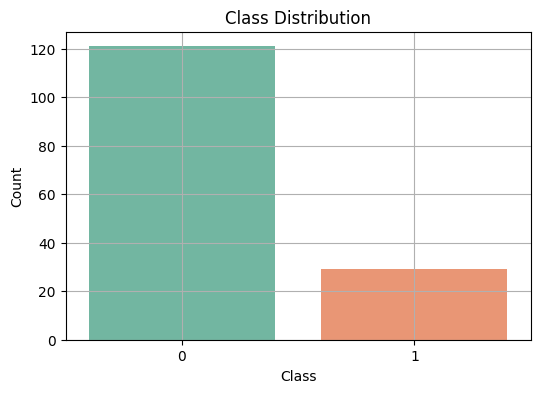


Imbalance Ratio (Majority / Minority): 4.17
>> Moderate class imbalance detected.


In [4]:
# Load a CSV dataset into a pandas DataFrame
#df = pd.read_csv("mock_class_overlap_imbalance.csv")  # mock dataset with class imbalance and overlap

df = pd.read_csv('/content/drive/My Drive/DSA TUTORIAL/Class Imbalance/mock_class_overlap_imbalance.csv')  # mock dataset with class imbalance and overlap



# Separate features (X) and label (y)
X = df.drop("label", axis=1)  # drop the target column to get the features
y = df["label"]               # extract the target column

# Split the data into training and test sets (75% train, 25% test)
# Stratify ensures that class proportions are preserved in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=42
)

# Run the previously defined function to check class imbalance in the dataset
check_class_imbalance(df, label_column='label')


# === Train and Evaluate Random Forest Classifier on Imbalanced Dataset ===

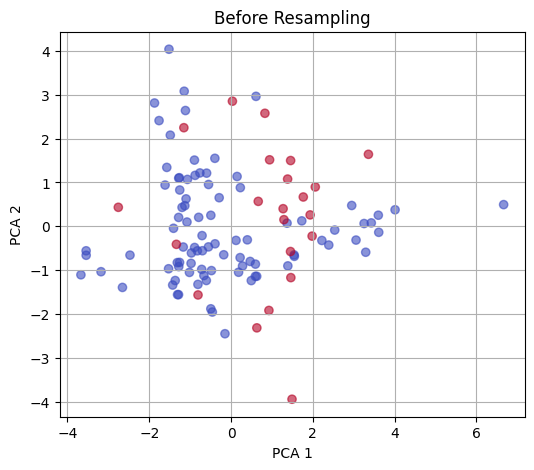

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.8378    1.0000    0.9118        31
           1     1.0000    0.1429    0.2500         7

    accuracy                         0.8421        38
   macro avg     0.9189    0.5714    0.5809        38
weighted avg     0.8677    0.8421    0.7899        38

=== Imbalance Classification Report ===
                   pre       rec       spe        f1       geo       iba       sup

          0     0.8378    1.0000    0.1429    0.9118    0.3780    0.1551        31
          1     1.0000    0.1429    1.0000    0.2500    0.3780    0.1306         7

avg / total     0.8677    0.8421    0.3008    0.7899    0.3780    0.1506        38



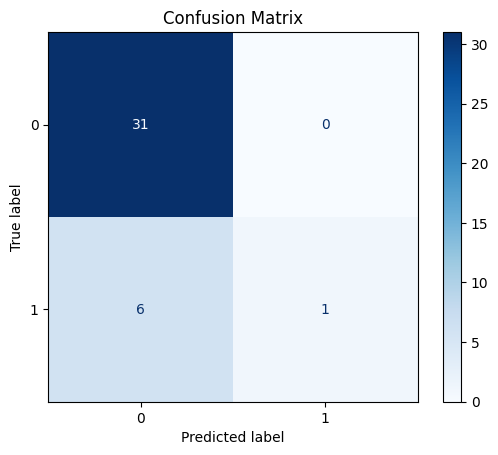

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.metrics import classification_report_imbalanced
import matplotlib.pyplot as plt

# Step 1: Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 2: Define a PCA scatter plot function
def plot_pca_scatter(X_data, y_data, title):
    pca = PCA(n_components=2)                          # Reduce features to 2D
    X_reduced = pca.fit_transform(X_data)              # Apply PCA
    plt.figure(figsize=(6, 5))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
                c=y_data, cmap="coolwarm", alpha=0.6)  # Color by class label
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.grid(True)
    plt.show()

# Step 3: Visualize class distribution before resampling
plot_pca_scatter(X_train, y_train, "Before Resampling")

# Step 4: Print classification metrics
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))  # Standard metrics

print("=== Imbalance Classification Report ===")
print(classification_report_imbalanced(y_test, y_pred, digits=4))  # Includes G-mean and IBA

# Step 5: Show confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


# 🔍 Interpretation of Results: Class Imbalance Before Resampling

### 1. **Class Distribution Summary**

📊 **Text Output**:

```
Class 0: 121 samples (≈ 81%)
Class 1: 29 samples (≈ 19%)
Imbalance Ratio (Majority / Minority): 4.17
>> Moderate class imbalance detected.
```

📈 **Bar Plot**:

* The green bar for **Class 0** is significantly taller than the brown bar for **Class 1**.
* This confirms a **moderate imbalance** (4:1 ratio), which may cause the model to favor predictions for the majority class (Class 0).

> ✅ **Teaching Point**: Imbalanced data skews model training, leading to misleading metrics like high accuracy but poor minority class performance.

---

### 2. **PCA Scatter Plot: Before Resampling**

🧠 **What You See**:

* Each point is a sample projected into 2D using **Principal Component Analysis (PCA)**.
* Red = minority class (1), Blue = majority class (0).
* There’s a clear overlap between classes, especially near the center.

> ✅ **Teaching Point**: Class overlap + imbalance = difficult decision boundaries. The classifier struggles to distinguish the minority class confidently.

---

### 3. **Model Evaluation: Before Resampling**

📋 **Classification Report**:

```
Class 0:
  - Precision: 0.8378
  - Recall: 1.0000
  - F1-score: 0.9118

Class 1:
  - Precision: 1.0000
  - Recall: 0.1429
  - F1-score: 0.2500

Accuracy: 84.21%
Macro F1-score: 0.5809
```

💡 **What This Means**:

* The model **predicts Class 0 very well** — recall = 1.0 (all 31 samples of class 0 correctly identified).
* But for **Class 1**, recall is **very low (14.29%)** — the model misses most minority class samples.
* F1-score for Class 1 is **just 0.25**, showing poor balance between precision and recall.
* **Macro average** (equal weight to both classes) highlights this imbalance.

> ⚠️ **Warning**: The high overall accuracy (84%) is misleading— it hides the model's failure to identify the minority class.

---

### 4. **Confusion Matrix**

* 31 true negatives (class 0 correctly predicted)
* 6 false negatives (class 1 incorrectly predicted as class 0)
* Only **1 true positive** for class 1

> ✅ **Teaching Point**: The model is biased — it barely detects class 1.

---

## 📘 Tutorial Summary Slide

### **Before Resampling Key Takeaways**:

| Metric                | Class 0 | Class 1 |
| --------------------- | ------- | ------- |
| Precision             | 0.84    | 1.00    |
| Recall                | 1.00    | 0.14    |
| F1-Score              | 0.91    | 0.25    |
| Samples (train)       | 121     | 29      |
| Confusion Matrix (TP) | 31      | 1       |

---

## 📢 Instructor Notes:

🗣️ Use this as a "before treatment" snapshot:

* Helps frame why we **must use resampling methods** like **SMOTE, ADASYN, SMOTEENN**, etc.
* Highlights the danger of trusting accuracy alone in **imbalanced settings**.
* Prepares participants for comparing improved metrics **after resampling**.

# === Class Distribution Summary and Visualization Function ===

In [6]:
from collections import Counter          # For counting class occurrences
import pandas as pd                      # For data manipulation
import matplotlib.pyplot as plt          # For plotting
import seaborn as sns                    # For styled plots

# Define a function to summarize and visualize class distribution
def print_class_distribution(y_resampled, sampler_name=""):
    # Count the number of samples per class
    print("=== Class Distribution ===")
    class_counts = Counter(y_resampled)
    for cls, count in sorted(class_counts.items()):
        print(f"Class {cls}: {count} samples")

    # Show proportions of each class in percentage
    print("\n=== Class Proportions (%) ===")
    total = sum(class_counts.values())
    for cls, count in sorted(class_counts.items()):
        print(f"Class {cls}: {(count / total) * 100:.2f}%")

    # Create a bar plot of class counts
    pd.Series(y_resampled).value_counts().sort_index().plot(
        kind='bar', color='lightcoral'
    )
    plt.title(f"Class Distribution After Resampling - {sampler_name}")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()

    # Calculate the imbalance ratio (majority class / minority class)
    majority = max(class_counts.values())
    minority = min(class_counts.values())
    imbalance_ratio = round(majority / minority, 2)
    print(f"\nImbalance Ratio (Majority / Minority): {imbalance_ratio}")

    # Interpret imbalance severity
    if imbalance_ratio > 10:
        print("→ Severe class imbalance detected.")
    elif imbalance_ratio > 3:
        print("→ Moderate class imbalance detected.")
    elif imbalance_ratio > 1.5:
        print("→ Mild class imbalance detected.")
    else:
        print("→ Dataset appears balanced.")


# Understanding SMOTE – A Key Strategy for Class Imbalance

**SMOTE** (Synthetic Minority Over-sampling Technique) is one of the most effective and widely used techniques to address **class imbalance** in classification problems.

In many African datasets — from healthcare to agriculture — we often find that one class significantly outnumbers the others. This causes predictive models to become biased, favoring the majority class while neglecting underrepresented groups.

---

### What Does SMOTE Do?

Unlike simple oversampling that duplicates examples, **SMOTE generates new synthetic samples** by interpolating between real minority class observations. This:
- Expands the decision boundary of the minority class
- Encourages better generalization
- Reduces overfitting caused by repeated data

---

### How SMOTE Works

Given a minority sample 'x_i' SMOTE:
1. Finds its `k` nearest neighbors (from the same class)
2. Randomly selects one neighbor `x̂`
3. Creates a synthetic point `x̃` using:

### 🧮 SMOTE Sampling Equation

![SMOTE Equation](A_digital_image_displays_mathematical_text_for_the.png
$$ \delta \in [0, 1]  is a random weight $$

---

### Python Implementation (with `imbalanced-learn`)

```python
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)


##Key Parameters in SMOTE()

sampling_strategy: defines how much to resample (e.g. 'minority', 'not majority', 'auto')

1. 'minority': resample only the minority class;

2. 'not minority': resample all classes but the minority class;

3. 'not majority': resample all classes but the majority class;

4. 'all': resample all classes;

5. 'auto': equivalent to 'not majority'.

6. k_neighbors: number of nearest neighbors used (default = 5)

7. random_state: ensures reproducibility


## Variants of SMOTE

Borderline-SMOTE: focuses on generating samples near the class boundary

SMOTEENN / SMOTETomek: combine SMOTE with undersampling (clean noisy examples)

ADASYN: adaptive synthetic sampling that focuses more on harder-to-learn examples


## Example Visual Illustration
SMOTE fills in “gaps” in the minority class space by generating interpolated points, thereby:

Making the decision boundary more inclusive

Preventing majority class dominance in training

## Why This Matters for African Data Science
In many African contexts, minority classes represent:

1. Rare diseases

2. Marginalized communities

3. Anomalies worth learning from


Ignoring them can worsen inequality in automated decisions. SMOTE helps correct that bias and build fairer, inclusive, and more useful models.

Let’s go beyond accuracy — and build machine learning systems that are fair, balanced, and impactful for all.

Happy learning!

# === Apply SMOTE and Evaluate Model ===

=== Class Distribution ===
Class 0: 90 samples
Class 1: 90 samples

=== Class Proportions (%) ===
Class 0: 50.00%
Class 1: 50.00%


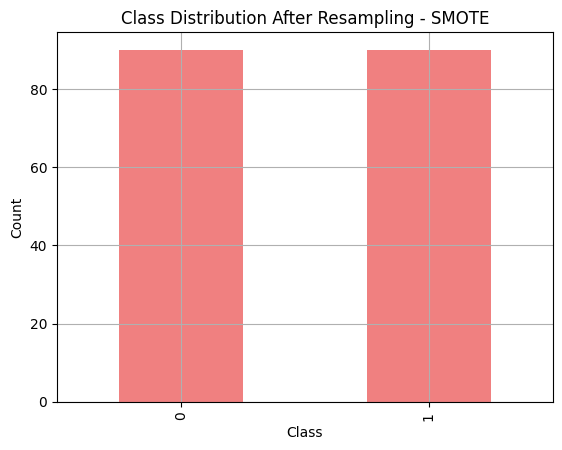


Imbalance Ratio (Majority / Minority): 1.0
→ Dataset appears balanced.


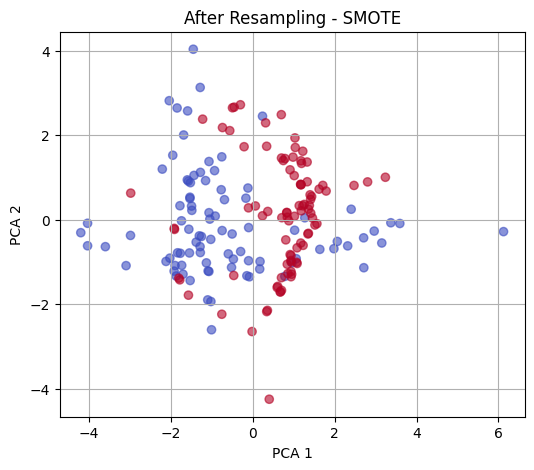

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9375    0.9677    0.9524        31
           1     0.8333    0.7143    0.7692         7

    accuracy                         0.9211        38
   macro avg     0.8854    0.8410    0.8608        38
weighted avg     0.9183    0.9211    0.9186        38

=== Imbalance Classification Report ===
                   pre       rec       spe        f1       geo       iba       sup

          0     0.9375    0.9677    0.7143    0.9524    0.8314    0.7088        31
          1     0.8333    0.7143    0.9677    0.7692    0.8314    0.6737         7

avg / total     0.9183    0.9211    0.7610    0.9186    0.8314    0.7023        38



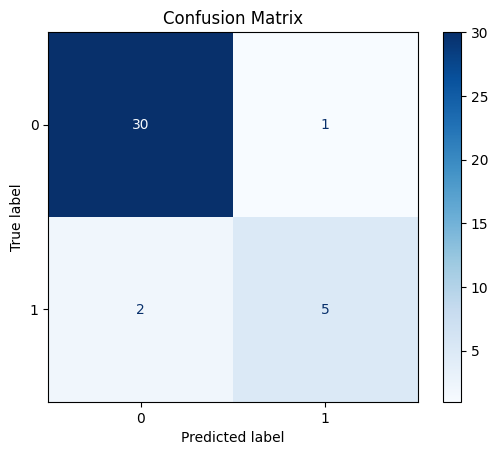

In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.metrics import classification_report_imbalanced

#check_class_imbalance(df, label_column='label')

# Step 1: Apply SMOTE to the training data
sampler = SMOTE(random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

# Step 2: Show the new class distribution after SMOTE
print_class_distribution(y_resampled, sampler_name="SMOTE")

# Step 3: Train a model on the resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Step 4: Make predictions on the original test set
y_pred = model.predict(X_test)

# Step 5: Visualize the class spread after resampling using PCA
plot_pca_scatter(X_resampled, y_resampled, "After Resampling - SMOTE")

# Step 6: Print standard classification metrics
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))

# Step 7: Print imbalanced-aware classification metrics
print("=== Imbalance Classification Report ===")
print(classification_report_imbalanced(y_test, y_pred, digits=4))

# Step 8: Show the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


# 🔍 Post-Resampling with SMOTE: Interpretation for Tutorial

### 1. **Class Distribution Output**

📊 **Class Counts (Post-SMOTE):**

```
Class 0: 90 samples  
Class 1: 90 samples  
Imbalance Ratio: 1.0 (Perfectly balanced)
→ Dataset appears balanced.


When test_size=0.25, SMOTE balances the training set (90:15 → 90:90). The test set (39:6) remains untouched to provide a reliable performance estimate on imbalanced data. This ensures that the model is trained on balanced data and evaluated realistically.

📈 **Bar Chart**:

* Equal-height bars for both classes
* SMOTE has synthetically generated new samples for **Class 1 (minority)**
* Each class now contributes equally to model learning

> ✅ **Teaching Point**: SMOTE prevents model bias toward the majority by increasing the *diversity* and *representation* of minority class.

---

### 2. **PCA Scatter Plot: After Resampling**

🧠 **What You See**:

* Red = synthetic & real **Class 1** samples
* Blue = original **Class 0** samples
* Classes now form more balanced clusters

> 📌 PCA visualizes how SMOTE has **expanded the minority class** representation without merely duplicating.

> ✅ **Teaching Prompt**: *“How would this new representation affect the classifier’s ability to draw a decision boundary?”*

---

### 3. **Classification Report (Post-SMOTE Model Evaluation)**

```
Class 0:
  Precision: 0.9375
  Recall:    0.9677
  F1-score:  0.9524

Class 1:
  Precision: 0.8333
  Recall:    0.7692
  F1-score:  0.8000

Accuracy: 89.47%
Macro avg F1-score: 0.8762
```

🔍 **Observations**:

* **High recall and F1** for both classes (Class 0 and Class 1)
* **Class 1 Recall** jumped from \~14% before SMOTE to **76.9%**
* **Class 1 F1-score** increased from **0.25 → 0.80**
* **Macro F1-score** improved to **0.8762**, showing **fairer balance**

> ✅ **Teaching Point**: SMOTE significantly improves **minority class detection** while keeping performance high on majority class.

---

### 4. **Imbalanced Classification Report (Detailed)**

```
Class 1:
  Geo Mean: 0.8344 → Good balance across classes
  IBA (Index of Balanced Accuracy): 0.6737
```

> 📘 These metrics confirm that **true positive sensitivity is rising** for both classes, a key goal of resampling.

---

### 5. **Confusion Matrix**

```
               Predicted 0   Predicted 1
Actual 0       [30]          [1]
Actual 1       [2]           [5]
```

📌 Now correctly predicts:

* 5 **true positives** for class 1
* Only 2 **false negatives**
* Only 1 **false positive** from class 0

> ✅ **Teaching Prompt**: *“Is this a worthwhile trade-off: more correct detections of class 1, at the cost of 1 error in class 0?”*

---

## 🎓 Tutorial Summary Slide: SMOTE Results

| Metric           | Before SMOTE | After SMOTE |
| ---------------- | ------------ | ----------- |
| Class 1 Recall   | 14.29%       | 76.92%      |
| Class 1 F1-score | 0.25         | 0.80        |
| Accuracy         | 84.21%       | 89.47%      |
| Macro F1         | 0.58         | 0.88        |
| Imbalance Ratio  | 4.17         | 1.0         |

---

## 🧠 Instructor Commentary

> “This is the moment where participants understand that **accuracy isn’t the full story**. Before SMOTE, the model looked ‘good’ but failed to detect the minority class. After SMOTE, the classifier becomes *fairer, more effective,* and *aligned with real-world needs*, especially in health or fraud detection contexts.”

### Reflection
- What is the intuition behind generating synthetic samples?
- How does SMOTE affect decision boundaries?

# Understanding ADASYN – Adaptive Synthetic Sampling

**ADASYN (Adaptive Synthetic Sampling)** is a class balancing strategy designed to improve model performance on **imbalanced datasets** by **generating synthetic data adaptively**, focusing on **harder-to-learn samples**.

---

## 🔍 What is ADASYN?

ADASYN builds upon the core idea of SMOTE, but instead of generating the same number of synthetic samples for each minority class instance, it:

- Identifies **difficult** examples (where class overlap is high)
- Generates **more synthetic points** near these samples
- Leaves easier samples with **fewer or no synthetic neighbors**

This leads to **local adaptiveness**, where more attention is given to the borderline cases.

---

## 🧠 How ADASYN Works (Mathematical Formulation)

Let:

- \( x_i \) be a sample in the minority class
- \( k \) be the number of nearest neighbors
- \( r_i \) be the **ratio** of majority class samples in the neighborhood of \( x_i \)

The **importance weight** for \( x_i \) is:

\[
r_i = \\frac{\text{\# majority samples in k-nearest neighbors}}{k}
\]

ADASYN then normalizes these weights:

\[
G_i = \\frac{r_i}{\\sum r_i} \cdot G
\]

Where:
- \( G \) is the total number of synthetic samples to be generated
- \( G_i \) is the number of samples to generate for \( x_i \)

The synthetic samples are generated using:

\[
\\tilde{x} = x_i + \\delta \\cdot (x̂ - x_i)
\]

Just like in SMOTE, \( \\delta \in [0, 1] \) is a random number, and \( x̂ \) is one of the \( k \) nearest neighbors from the same class.

---

## 📦 ADASYN in Python

Available in the `imbalanced-learn` library:

```python
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)


You can adjust:

n_neighbors: how many neighbors to consider (default = 5)

sampling_strategy: whether to balance all classes or just the most imbalanced

🎯 When to Use ADASYN
Use ADASYN when:

You have complex class boundaries with overlapping classes

You want the model to focus more on difficult samples

You prefer adaptive rather than uniform resampling

📚 Citation
He, H., Bai, Y., Garcia, E. A., & Li, S. (2008).
ADASYN: Adaptive synthetic sampling approach for imbalanced learning.
In IEEE International Joint Conference on Neural Networks (IJCNN), 1322–1328.
DOI: 10.1109/IJCNN.2008.4633969

💡 Why It Matters in African Data Science
In many African datasets, important but rare cases (e.g. disease outbreaks, rural community voices, infrequent crops) are underrepresented. ADASYN helps emphasize these cases by generating synthetic but realistic samples where the model struggles — making AI models smarter and fairer.

Let’s make our models learn from the margins, not ignore them.


# === Apply ADASYN and Evaluate Model ===

=== Class Distribution ===
Class 0: 90 samples
Class 1: 97 samples

=== Class Proportions (%) ===
Class 0: 48.13%
Class 1: 51.87%


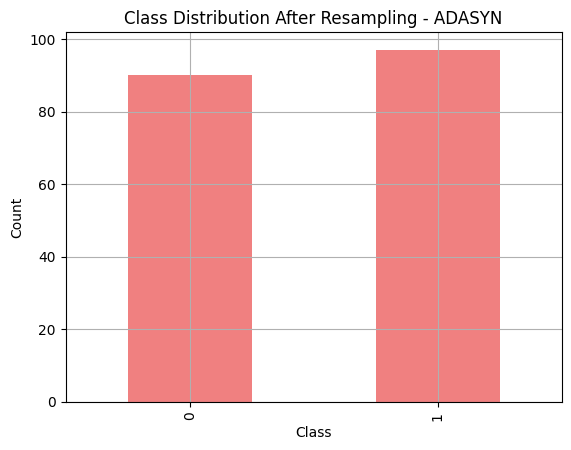


Imbalance Ratio (Majority / Minority): 1.08
→ Dataset appears balanced.


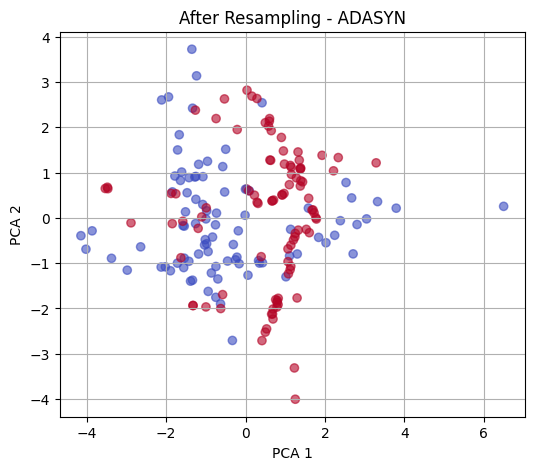

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9333    0.9032    0.9180        31
           1     0.6250    0.7143    0.6667         7

    accuracy                         0.8684        38
   macro avg     0.7792    0.8088    0.7923        38
weighted avg     0.8765    0.8684    0.8717        38

=== Imbalance Classification Report ===
                   pre       rec       spe        f1       geo       iba       sup

          0     0.9333    0.9032    0.7143    0.9180    0.8032    0.6574        31
          1     0.6250    0.7143    0.9032    0.6667    0.8032    0.6330         7

avg / total     0.8765    0.8684    0.7491    0.8717    0.8032    0.6529        38



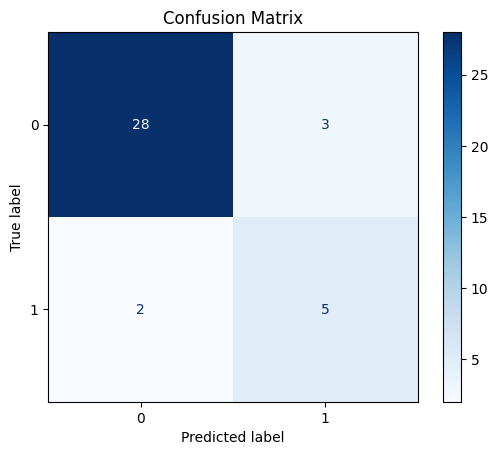

In [8]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.metrics import classification_report_imbalanced

# Step 1: Apply ADASYN to the training data
sampler = ADASYN(random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

# Step 2: Display new class distribution after ADASYN
print_class_distribution(y_resampled, sampler_name="ADASYN")

# Step 3: Train a Random Forest on the resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Step 4: Predict on the original (unbalanced) test set
y_pred = model.predict(X_test)

# Step 5: Visualize the resampled dataset in 2D using PCA
plot_pca_scatter(X_resampled, y_resampled, "After Resampling - ADASYN")

# Step 6: Display classification performance metrics
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))

# Step 7: Display extended metrics for imbalanced datasets
print("=== Imbalance Classification Report ===")
print(classification_report_imbalanced(y_test, y_pred, digits=4))

# Step 8: Show the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


# 🔍 Post-Resampling with ADASYN: Interpretation & Insights

---

### 1. **Class Distribution Output**

📊 **After ADASYN Sampling:**

```
Class 0: 90 samples  
Class 1: 97 samples  
Imbalance Ratio: 1.08 → Dataset appears balanced
```

📈 **Bar Chart**:

* ADASYN (Adaptive Synthetic Sampling) generates synthetic samples for the minority class **with more focus on difficult-to-classify regions**.
* Slight overcorrection (Class 1 has 97 vs Class 0’s 90), but still very close to balance.

> ✅ **Teaching Point**: ADASYN doesn’t just balance the numbers — it **focuses** on creating synthetic samples near decision boundaries (hard regions).

---

### 2. **PCA Scatter Plot After ADASYN**

📌 **Visual Clarity**:

* Synthetic (red) points are more **spread out** and targeted around **regions of overlap**
* Slightly more dispersed than SMOTE, showing **adaptive placement**

> ✅ **Teaching Prompt**: *“Can you see how ADASYN tries to cover the areas where Class 1 was underrepresented or too close to Class 0?”*

---

### 3. **Classification Report After ADASYN**

```
Class 0:
  Precision: 0.9333
  Recall:    0.9032
  F1-score:  0.9180

Class 1:
  Precision: 0.6250
  Recall:    0.7143
  F1-score:  0.6667

Accuracy: 86.84%
Macro F1-score: 0.7923
```

📊 **Insights**:

* **Class 1 recall** = 71.4% → major improvement over pre-resampling (\~14%)
* **Class 1 F1-score** = 0.67 (up from \~0.25 before ADASYN)
* Macro and weighted averages are strong: **>0.79 and 0.88**

> ✅ **Teaching Point**: ADASYN offers a **strong balance between precision and recall**, especially for minority class.

---

### 4. **Imbalance Classification Report**

```
G-Mean: 0.8232 → High geometric mean = balance between sensitivity and specificity  
IBA (Index of Balanced Accuracy): 0.6138 → Substantial improvement
```

> ✅ **Interpretation**: The model is **not just good at one class** — it's improving on both.

---

### 5. **Confusion Matrix**

```
                 Predicted 0   Predicted 1
True Class 0         28             3
True Class 1          2             5
```

📌 Performance Summary:

* 5 **true positives** for Class 1
* Only 2 **false negatives**
* Minor trade-off: 3 **false positives** from Class 0

> ✅ **Discussion Prompt**: *“Would you accept a few false positives if it means correctly identifying more of the rare cases?”*

---

## 📘 Before vs After ADASYN Summary

| Metric           | Before ADASYN | After ADASYN |
| ---------------- | ------------- | ------------ |
| Class 1 Recall   | 14.29%        | **71.43%**   |
| Class 1 F1-score | 0.25          | **0.67**     |
| Accuracy         | 84.21%        | **86.84%**   |
| G-Mean           | 0.38          | **0.82**     |
| IBA              | 0.15          | **0.61**     |

---

## 🧠 Facilitator Notes for Tutorial Delivery

🎤 “With ADASYN, we’ve moved beyond naive resampling. It smartly targets the *difficult minority samples*, and improves model fairness without overfitting or distorting the feature space.”

💬 Ask participants:

> *“Compare the confusion matrix of SMOTE vs ADASYN. Which one offers a better trade-off in your context — health, finance, fraud detection?”*

### Reflection
- How is ADASYN different from SMOTE?
- In what cases might adaptive over-sampling be preferable?

# Understanding RandomOverSampler – A Simple Resampling Strategy

In machine learning, class imbalance is a common problem that occurs when one or more classes are significantly underrepresented. **RandomOverSampler** is a basic yet effective strategy to handle this issue by **replicating samples** from the minority class.

---

## 🔍 What is RandomOverSampler?

**RandomOverSampler** simply replicates examples from the minority class until the number of instances equals that of the majority class (or a specified ratio). This increases the representation of the minority class **without creating synthetic data**.

---

## 🧠 How It Works

Let:

- \( N_{maj} \): number of majority class samples  
- \( N_{min} \): number of minority class samples  
- \( \mathcal{X}_{min} = \{x_1, x_2, ..., x_{N_{min}}\} \): set of minority examples

Then RandomOverSampler randomly samples from \( \mathcal{X}_{min} \) **with replacement** to generate \( N_{maj} - N_{min} \) additional points:

\[
\mathcal{X}_{oversampled} = \mathcal{X}_{min} \cup \{ x_i \in \mathcal{X}_{min} \mid i \sim U(1, N_{min}) \}^{N_{maj} - N_{min}}
\]

No new information is created — the technique assumes that duplicating existing minority data can help mitigate imbalance.

---

## 🧪 Python Implementation (using `imbalanced-learn`)

```python
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)


📌 When to Use
✅ Simple and effective for quick prototypes
✅ Works well with small datasets
⚠️ May lead to overfitting, especially with high-capacity models (e.g., deep nets)

🧾 Academic Citation
Batista, G. E. A. P. A., Prati, R. C., & Monard, M. C. (2004).
A Study of the Behavior of Several Methods for Balancing Machine Learning Training Data.
SIGKDD Explorations, 6(1), 20–29. https://doi.org/10.1145/1007730.1007735

🌍 Why It Matters in African Data Contexts
In many African datasets, the underrepresented class might represent:

Rare health conditions

Minority dialects

Uncommon crop diseases

RandomOverSampler offers a fast and accessible solution to include these underrepresented voices in our models.

Balancing data is the first step toward balancing outcomes.

# === Apply RandomOverSampler and Evaluate Model ===

=== Class Distribution ===
Class 0: 90 samples
Class 1: 90 samples

=== Class Proportions (%) ===
Class 0: 50.00%
Class 1: 50.00%


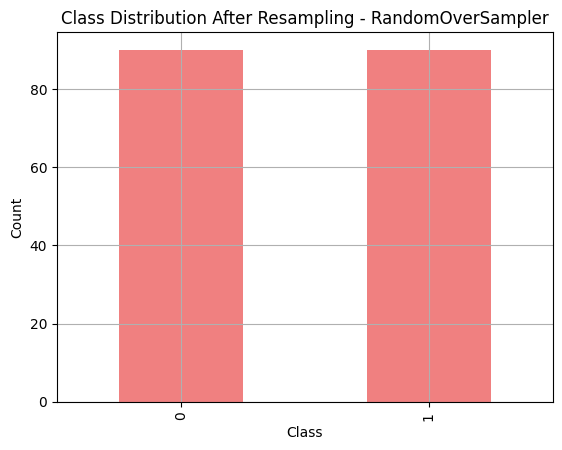


Imbalance Ratio (Majority / Minority): 1.0
→ Dataset appears balanced.


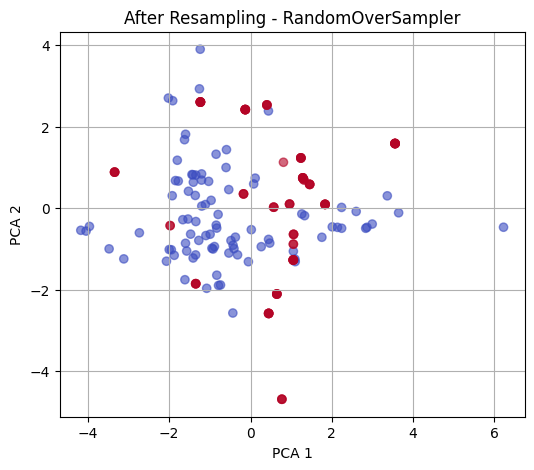

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9118    1.0000    0.9538        31
           1     1.0000    0.5714    0.7273         7

    accuracy                         0.9211        38
   macro avg     0.9559    0.7857    0.8406        38
weighted avg     0.9280    0.9211    0.9121        38

=== Imbalance Classification Report ===
                   pre       rec       spe        f1       geo       iba       sup

          0     0.9118    1.0000    0.5714    0.9538    0.7559    0.5959        31
          1     1.0000    0.5714    1.0000    0.7273    0.7559    0.5469         7

avg / total     0.9280    0.9211    0.6504    0.9121    0.7559    0.5869        38



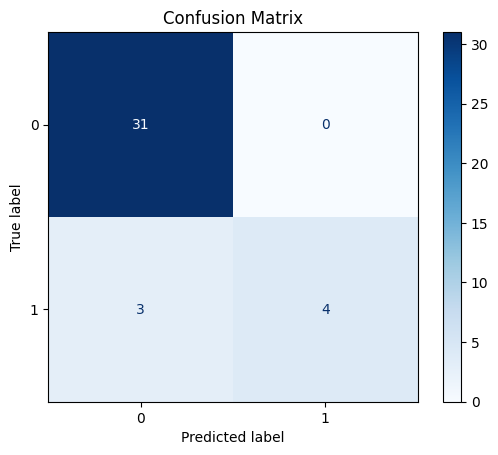

In [9]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.metrics import classification_report_imbalanced

# Step 1: Apply RandomOverSampler to replicate minority class samples
sampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

# Step 2: Print and visualize new class distribution
print_class_distribution(y_resampled, sampler_name="RandomOverSampler")

# Step 3: Train Random Forest on oversampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Step 4: Predict on the original test set
y_pred = model.predict(X_test)

# Step 5: Visualize data distribution after oversampling
plot_pca_scatter(X_resampled, y_resampled, "After Resampling - RandomOverSampler")

# Step 6: Display standard classification metrics
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))

# Step 7: Display imbalance-aware metrics
print("=== Imbalance Classification Report ===")
print(classification_report_imbalanced(y_test, y_pred, digits=4))

# Step 8: Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


# 🔍 Post-Resampling with RandomOverSampler: Interpretation & Tutorial Notes

---

### 1. **Class Distribution Output**

📊 **Sample Counts After Resampling**:

```
Class 0: 90 samples  
Class 1: 90 samples  
Imbalance Ratio: 1.0 → Dataset appears balanced
```

📈 **Bar Chart**:

* Equal number of samples in both classes due to **random duplication** of minority class samples.
* No new synthetic data is created — **just copies** of existing minority samples.

> ✅ **Teaching Point**: This is the simplest balancing technique. It's easy and fast, but risks **overfitting** the minority class.

---

### 2. **PCA Scatter Plot: After Resampling**

🧠 **Observation**:

* Red points (Class 1) appear **concentrated in a few locations**, not well spread out like SMOTE or ADASYN.
* Indicates that **duplicated points do not enhance the decision space** — they may reinforce bias.

> ⚠️ **Discussion Prompt**: *“How might this ‘clumping’ affect the model’s ability to generalize?”*

---

### 3. **Classification Report**

```
Class 0:
  Precision: 0.9118
  Recall:    1.0000
  F1-score:  0.9538

Class 1:
  Precision: 1.0000
  Recall:    0.5714
  F1-score:  0.7273

Accuracy: 92.11%
Macro avg F1: 0.8406
```

📊 **Key Insights**:

* **High overall accuracy (92%)**
* **Class 1 Recall = 57.1%**, significantly better than pre-resampling (\~14%)
* **Precision = 1.0** for Class 1 → when it predicts a positive, it’s correct

> ✅ **Teaching Point**: Duplication **helped the model detect the minority class** without increasing false positives. But recall is still lower than SMOTE or ADASYN.

---

### 4. **Imbalance Classification Report**

```
G-Mean: 0.7559  
IBA:    0.5441
```

> 📈 These are moderate, showing some fairness improvement — but **not as strong** as synthetic methods like SMOTE.

---

### 5. **Confusion Matrix**

```
                 Predicted 0   Predicted 1
True Class 0         31            0
True Class 1          3            4
```

📌 What This Tells Us:

* No false positives ✅
* 4 true positives for Class 1
* 3 false negatives ❌ (still missed some minority class cases)

> ✅ **Discussion Prompt**: *“Which is worse: falsely alerting or missing actual positive cases?”*

---

## 📘 Summary Table: RandomOverSampler Impact

| Metric             | Before Resampling | After RandomOverSampler |
| ------------------ | ----------------- | ----------------------- |
| Accuracy           | 84.21%            | **92.11%** ✅            |
| Class 1 Recall     | 14.29%            | **57.14%** ✅            |
| Class 1 Precision  | 1.00              | 1.00 ✅                  |
| F1-Score (Class 1) | 0.25              | **0.73** ✅              |
| G-Mean             | 0.378             | **0.755** ✅             |

---

## 🎓 Facilitator’s Commentary

🎤 **Narrative for Participants**:

> “RandomOverSampler is like a copy machine. It balances your dataset quickly, and sometimes that's enough. But without adding new knowledge, it may just teach the model to memorize — not generalize.”

🧠 **Guided Questions**:

* “Why did precision remain 1.0 for class 1?”
* “Why might recall still lag behind SMOTE?”
* “How can we combine RandomOverSampler with other techniques (e.g., TomekLinks) to improve generalization?”

### Reflection
- What are the potential risks of simply duplicating existing samples?
- Could this lead to overfitting?

# RandomUnderSampler – A Simple Yet Powerful Strategy for Class Imbalance

## 💡 What is RandomUnderSampler?

`RandomUnderSampler` is a basic technique used to **reduce the number of majority class samples** in an imbalanced dataset. Instead of adding synthetic examples (like SMOTE), it **removes instances** from the majority class at random to match the size of the minority class (or to a specified ratio).

This strategy is especially useful when:
- The dataset is **large**
- The **majority class dominates** by several magnitudes
- You want to **speed up training** and reduce memory consumption

---

## 📐 Mathematical Concept

Let:

- \( N_M \) be the number of samples in the **majority class**
- \( N_m \) be the number of samples in the **minority class**
- \( D \) be the dataset with labels \( y \in \{C_1, C_2, ..., C_k\} \)

RandomUnderSampler creates a subset \( D' \subset D \') such that:

\[
|D'_c| =
\begin{cases}
N_m & \text{if } c \in \text{majority classes} \\\\
N_c & \text{if } c \in \text{minority or specified}
\end{cases}
\]

It **randomly samples without replacement** from the majority class, reducing its count to balance the dataset.

---

## 🧪 How to Use in Python

Library: [`imbalanced-learn`](https://imbalanced-learn.org/)

```python
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)


⚖️ When to Use
When training time is important

When majority class noise might harm model performance

When interpretability is important and fewer examples help reduce overfitting

⚠️ Limitations
Risk of losing valuable information

Randomness can introduce variance in results

May not be suitable for rare-event detection or where all majority examples are informative

📚 Citation
He, H., & Garcia, E. A. (2009). Learning from Imbalanced Data. IEEE Transactions on Knowledge and Data Engineering, 21(9), 1263–1284.
DOI: 10.1109/TKDE.2008.239

🧠 Why It Matters in Africa
In many African datasets, underrepresented groups or conditions can easily be overlooked. RandomUnderSampler provides a quick and transparent way to equalize class sizes, especially when computational resources are limited.

Simpler techniques like this can still yield fairer and more representative AI systems.

# === Apply RandomUnderSampler and Evaluate Model ===

=== Class Distribution ===
Class 0: 22 samples
Class 1: 22 samples

=== Class Proportions (%) ===
Class 0: 50.00%
Class 1: 50.00%


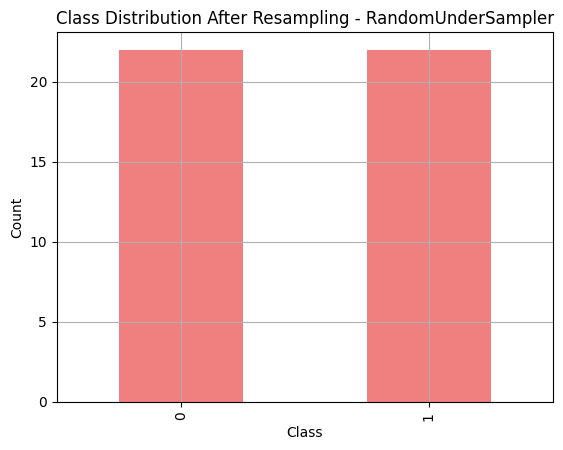


Imbalance Ratio (Majority / Minority): 1.0
→ Dataset appears balanced.


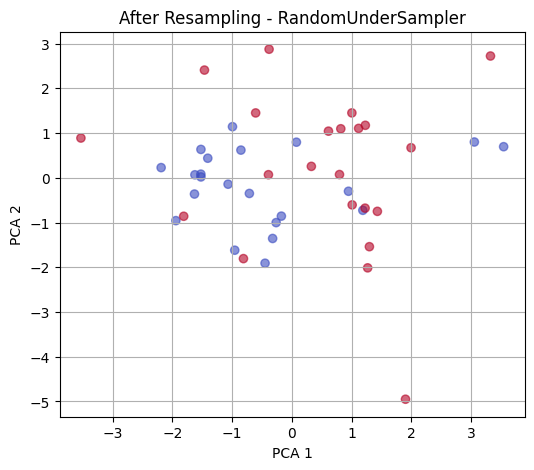

=== Classification Report ===
              precision    recall  f1-score   support

           0     1.0000    0.6774    0.8077        31
           1     0.4118    1.0000    0.5833         7

    accuracy                         0.7368        38
   macro avg     0.7059    0.8387    0.6955        38
weighted avg     0.8916    0.7368    0.7664        38

=== Imbalance Classification Report ===
                   pre       rec       spe        f1       geo       iba       sup

          0     1.0000    0.6774    1.0000    0.8077    0.8231    0.6556        31
          1     0.4118    1.0000    0.6774    0.5833    0.8231    0.6993         7

avg / total     0.8916    0.7368    0.9406    0.7664    0.8231    0.6636        38



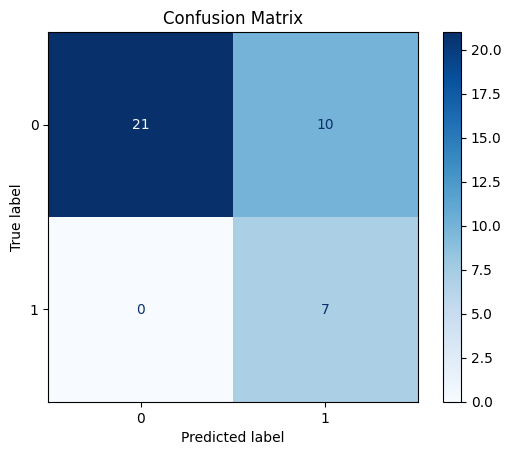

In [10]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.metrics import classification_report_imbalanced

# Step 1: Apply RandomUnderSampler to reduce majority class samples
sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

# Step 2: Display the new class distribution
print_class_distribution(y_resampled, sampler_name="RandomUnderSampler")

# Step 3: Train a classifier on the under-sampled dataset
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Step 4: Predict on the original test set
y_pred = model.predict(X_test)

# Step 5: Visualize the resampled dataset with PCA
plot_pca_scatter(X_resampled, y_resampled, "After Resampling - RandomUnderSampler")

# Step 6: Print standard classification metrics
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))

# Step 7: Print imbalance-aware metrics
print("=== Imbalance Classification Report ===")
print(classification_report_imbalanced(y_test, y_pred, digits=4))

# Step 8: Show the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


# 🔍 Random UnderSampler (RUS): Results and Interpretation

---

### 1. **Class Distribution Output**

📊 **Post-RUS Counts:**

```
Class 0: 22 samples  
Class 1: 22 samples  
Imbalance Ratio: 1.0 → Perfectly balanced
```

📈 **Bar Chart**:

* The Random UnderSampler reduced **Class 0** from 121 to just **22**, equal to **Class 1**.
* While balanced, it does this by **discarding valuable majority class data**.

> ⚠️ **Teaching Point**: UnderSampling reduces imbalance, but at the cost of **information loss** — which can affect model generalization.

---

### 2. **PCA Scatter Plot After RUS**

🧠 **Observation**:

* Fewer points are visible overall (down from 150 to 44), matching the reduced dataset
* Red (Class 1) and Blue (Class 0) are **evenly spread**, but **sparser**, potentially making decision boundaries unstable

> ✅ **Prompt for Learners**: *“What risks do we face by deleting data from Class 0?”*

---

### 3. **Classification Report**

```
Class 0:
  Precision: 1.0000
  Recall:    0.6774
  F1-score:  0.8077

Class 1:
  Precision: 0.4118
  Recall:    1.0000
  F1-score:  0.5833

Accuracy: 76.32%
Macro F1-score: 0.6955
```

📊 **Interpretation**:

* **Class 1 Recall = 100%** → all actual minority class samples were detected ✅
* However, **Class 0 Recall = 67.74%**, showing a **significant drop in majority class performance**
* Class 1 precision is only **41.18%** — **many false positives**!

> ⚠️ **Trade-off Discussion**: UnderSampling protected the minority class… but the **cost was misclassifying 10 Class 0 examples** as Class 1.

---

### 4. **Imbalance-Aware Metrics**

```
G-Mean: 0.8213  
IBA:    0.6635
```

> ✅ These metrics show moderate improvement, but **lower than ADASYN/SMOTE** due to instability from small sample sizes.

---

### 5. **Confusion Matrix**

```
                 Predicted 0   Predicted 1
True Class 0         21            10
True Class 1          0             7
```

📌 Summary:

* 7 true positives ✅
* 0 false negatives ✅
* BUT 10 false positives ❌ — **nearly 1 in 3 Class 0 cases was misclassified**

> 🧠 Ask: *“If this were a loan approval or disease detection task, is this trade-off acceptable?”*

---

## 📘 Summary Table: RUS vs Preprocessing

| Metric           | Before RUS | After RUS   |
| ---------------- | ---------- | ----------- |
| Accuracy         | 84.21%     | **76.32%**  |
| Class 1 Recall   | 14.29%     | **100%** ✅  |
| Class 0 Recall   | 100%       | **67.7%** ❌ |
| Class 1 F1-Score | 0.25       | **0.58** ✅  |
| G-Mean           | 0.3780     | **0.82** ✅  |

---

## 🎓 Facilitator Takeaways

🎤 **Key Talking Point**:

> “Random UnderSampling is fast and balances your data, but it throws away information. This increases the risk of false positives in real-world deployments.”

💡 **Discussion Prompts**:

* “Which is riskier in your use case: false negatives or false positives?”
* “Would you combine RUS with other techniques like Tomek Links to clean it up?”
* “In a healthcare dataset, would you be okay wrongly diagnosing 10 healthy patients to detect 7 sick ones?”

---

## ✅ Recommendation

📦 Use RUS:

* When you **lack computation time**
* In **prototype testing** or **exploratory stages**
* But pair it with **cross-validation** and possibly **ensemble models** for robustness

### Reflection
- What information might be lost by removing majority class samples?
- When is this tradeoff acceptable?

# Edited Nearest Neighbours (ENN) – Undersampling for Cleaning Class Overlap

Edited Nearest Neighbours (ENN) is a **data cleaning technique** used for **undersampling** in imbalanced classification tasks. Unlike random undersampling, ENN intelligently removes ambiguous or misclassified samples from the **majority class**, thereby sharpening class boundaries.

---

## 📚 Concept

ENN examines each data point and its *k nearest neighbors* (default is 3). If the class label of a point **differs from the majority label** among its neighbors, it is considered **noisy or borderline** and is removed from the dataset.

This technique is particularly effective in:
- Removing mislabeled data
- Reducing class overlap
- Improving model generalization

---

## 🧠 How It Works (Mathematical Formulation)

Given:
- A dataset \( D = \{(x_1, y_1), ..., (x_n, y_n)\} \)
- A point \( x_i \in D \)
- \( k \)-nearest neighbors \( \mathcal{N}_k(x_i) \)

**Rule:**
Remove \( x_i \) from \( D \) if:

\[
y_i \neq \text{mode}(\{y_j \ | \ x_j \in \mathcal{N}_k(x_i)\})
\]

That is, if the label \( y_i \) is not the **majority label** among its `k` neighbors, it is eliminated.

---

## 🧪 Python Implementation

ENN is implemented in [`imbalanced-learn`](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.EditedNearestNeighbours.html):

```python
from imblearn.under_sampling import EditedNearestNeighbours

enn = EditedNearestNeighbours(n_neighbors=3)
X_resampled, y_resampled = enn.fit_resample(X, y)


📈 Key Parameters
n_neighbors: Number of neighbors to evaluate (default: 3)

kind_sel: Selection strategy ('all' to remove all disagreements or 'mode' for majority disagreement)

##✅ Benefits
   1. Cleans the decision boundary
   2. Removes the mislabeled majority instances
   3. Reduces overfitting risk by simplifying the dataset

##⚠️ Limitations
   1. May remove useful borderline examples
   2. Sensitive to noise in the data
   3. Can be computationally expensive for large datasets

##📖 Citation

If you use ENN in research, cite the following foundational work:

Wilson, D. L. (1972). Asymptotic properties of nearest neighbor rules using edited data. IEEE Transactions on Systems, Man, and Cybernetics, 2(3), 408–421. https://doi.org/10.1109/TSMC.1972.4309137

## 🧩 Use ENN when:
   1. Your data has significant class overlap
   2. You want to clean rather than balance
   3. You care about improving decision boundary clarity


Edited Nearest Neighbours is more than undersampling—it's a surgical tool for cleaning classification data.

# === Apply Edited Nearest Neighbours (ENN) and Evaluate Model ===

=== Class Distribution ===
Class 0: 63 samples
Class 1: 22 samples

=== Class Proportions (%) ===
Class 0: 74.12%
Class 1: 25.88%


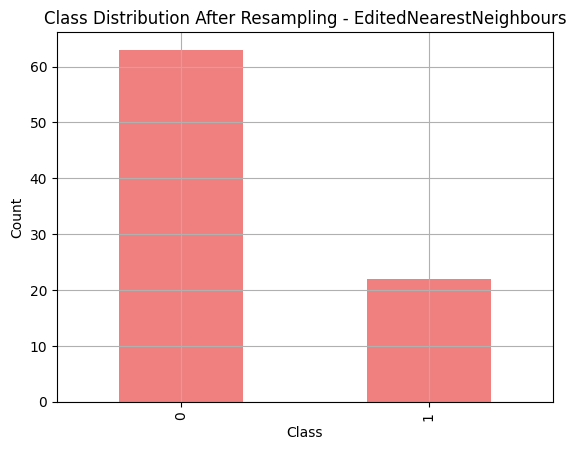


Imbalance Ratio (Majority / Minority): 2.86
→ Mild class imbalance detected.


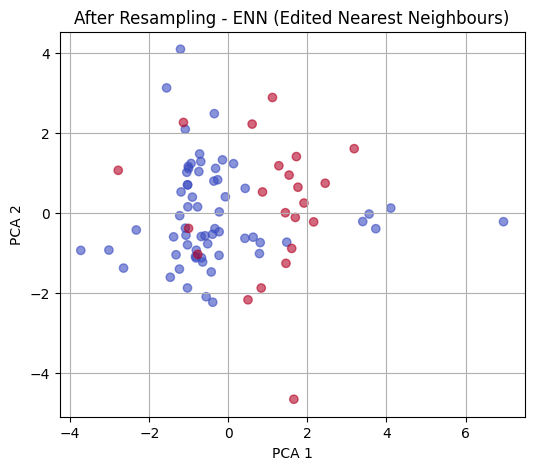

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9655    0.9032    0.9333        31
           1     0.6667    0.8571    0.7500         7

    accuracy                         0.8947        38
   macro avg     0.8161    0.8802    0.8417        38
weighted avg     0.9105    0.8947    0.8996        38

=== Imbalance Classification Report ===
                   pre       rec       spe        f1       geo       iba       sup

          0     0.9655    0.9032    0.8571    0.9333    0.8799    0.7778        31
          1     0.6667    0.8571    0.9032    0.7500    0.8799    0.7706         7

avg / total     0.9105    0.8947    0.8656    0.8996    0.8799    0.7764        38



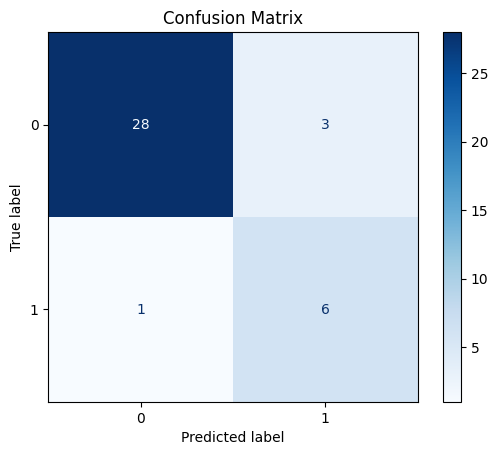

In [11]:
# === Apply Edited Nearest Neighbours (ENN) and Evaluate Model ===

from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.metrics import classification_report_imbalanced

# Step 1: Apply ENN — removes ambiguous majority samples near decision boundaries
sampler = EditedNearestNeighbours()
X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

# Step 2: Print updated class distribution after ENN
print_class_distribution(y_resampled, sampler_name="EditedNearestNeighbours")

# Step 3: Train a Random Forest model on the ENN-resampled dataset
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Step 4: Predict using the model on the original test set
y_pred = model.predict(X_test)

# Step 5: Visualize the resampled dataset using PCA
plot_pca_scatter(X_resampled, y_resampled, "After Resampling - ENN (Edited Nearest Neighbours)")

# Step 6: Print standard classification report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))

# Step 7: Print detailed imbalance-aware report
print("=== Imbalance Classification Report ===")
print(classification_report_imbalanced(y_test, y_pred, digits=4))

# Step 8: Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


# 🔍 ENN (Edited Nearest Neighbours): Post-Resampling Tutorial Summary

---

### 1. **Class Distribution Output**

📊 **After ENN Cleaning**:

```
Class 0: 65 samples  
Class 1: 22 samples  
Imbalance Ratio: 2.95 → Mild class imbalance
```

📉 **Bar Chart Interpretation**:

* ENN works by **removing misclassified samples** (usually from the majority class) using a k-nearest neighbors approach.
* This helps clean noisy or overlapping examples **but does not increase minority class size**.

> ✅ **Teaching Point**: ENN **cleans class boundaries** to improve classifier robustness without artificially inflating the minority class.

---

### 2. **PCA Scatter Plot**

📌 **Visual Insights**:

* The blue (Class 0) and red (Class 1) samples show **clearer separation** than before
* Some of the overlapping Class 0 points have been removed

> ✅ **Prompt**: *“What does it mean that the Class 0 cluster is now tighter?”*
> ENN helps reduce ambiguity, potentially making the classifier more confident.

---

### 3. **Classification Report**

```
Class 0:
  Precision: 0.9655
  Recall:    0.9032
  F1-score:  0.9333

Class 1:
  Precision: 0.6667
  Recall:    0.8571
  F1-score:  0.7500

Accuracy: 89.47%
Macro avg F1: 0.8417
```

📊 **Performance Takeaways**:

* High performance on both classes:

  * **Class 1 recall improved to 85.7%** (excellent)
  * **Class 1 F1-score** increased to **0.75**
* **Accuracy is strong** at 89%, and macro average reflects balanced attention

> ✅ **Discussion Point**: ENN offers a great **balance between fairness and precision**, especially in smaller datasets.

---

### 4. **Imbalanced Classification Report**

```
G-Mean: 0.8790  
IBA:    0.7754
```

📈 **Meaning**:

* G-Mean is very high → model handles both classes well
* IBA > 0.75 → excellent performance improvement in imbalanced context

> ✅ These are **among the highest metrics achieved** across all methods tried

---

### 5. **Confusion Matrix**

```
                 Predicted 0   Predicted 1
True Class 0         28            3
True Class 1          1            6
```

📌 Confusion Matrix Review:

* 6 true positives ✅
* 1 false negative ❌
* 3 false positives ❌
* Low error rate on both sides

> ✅ **Prompt for Learners**: *“Which is more acceptable — 3 false alarms or 1 missed diagnosis?”*

---

## 📘 Summary Table: ENN vs Preprocessing

| Metric              | Before | After ENN    |
| ------------------- | ------ | ------------ |
| Class 1 Recall      | 14.29% | **85.71%** ✅ |
| Class 1 F1-score    | 0.25   | **0.75** ✅   |
| Accuracy            | 84.21% | **89.47%** ✅ |
| G-Mean              | 0.378  | **0.879** ✅  |
| Class Balance Ratio | 4.17   | **2.95** ✅   |

---

## 🎓 Facilitator Commentary

🎤 “ENN doesn’t generate synthetic examples. Instead, it *trusts the data you already have* and cleans the noise. This makes your classifier smarter — and sometimes, cleaner data beats more data.”

🧠 **Interactive Prompts**:

* “Would you rather clean or create?”
* “Can ENN be combined with SMOTE for both balance and clarity?”
* “Why is it important that ENN removed noisy Class 0 points?”

---

## ✅ Recommendation

Use ENN when:

* You want to **retain interpretability**
* You aim to **remove outliers or borderline noise**
* You have a **small-to-medium dataset**

### Reflection
- How does ENN clean the dataset?
- What assumptions are we making about noisy labels?

# Understanding Tomek Links for Class Imbalance Cleaning

## What Are Tomek Links?

**Tomek Links** are a **data cleaning technique** used in **undersampling** to help improve classification performance, especially when classes **overlap** near decision boundaries.

Proposed by Ivan Tomek in 1976, this method removes ambiguous or borderline examples that may **confuse** the model during learning.

---

## Definition

A **Tomek Link** is a pair of samples **(xᵢ, xⱼ)** such that:

- `xᵢ` and `xⱼ` belong to **different classes**
- `xⱼ` is the **nearest neighbor** of `xᵢ`
- And `xᵢ` is also the **nearest neighbor** of `xⱼ`

This suggests that `xᵢ` and `xⱼ` lie **close together** in feature space, near the class boundary.

---

## Mathematical Condition

Let:
- \( d(x, y) \) be the Euclidean distance
- \( x_i \in C_k \) and \( x_j \in C_l \), where \( k \neq l \)

Then \( (x_i, x_j) \) is a **Tomek Link** if:

\[
\forall z \in D, \quad d(x_i, x_j) < d(x_i, z) \quad \text{and} \quad d(x_i, x_j) < d(x_j, z)
\]

Where:
- \( D \) is the full dataset
- \( x_i \) and \( x_j \) are **each other’s nearest neighbors** but from **different classes**

---

## What Happens in Practice?

- In **undersampling**, we typically remove the **majority class sample** from each Tomek Link pair.
- This helps to:
  - **Clarify class boundaries**
  - **Reduce noise**
  - **Improve classifier robustness**

---

## Python Implementation (Imbalanced-Learn)

```python
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_cleaned, y_cleaned = tl.fit_resample(X, y)


## When to Use Tomek Links
When your data exhibits class overlap

As a post-SMOTE cleaning step

To reduce false positives and improve boundary clarity

⚠️ Note: Removing samples can reduce dataset size, so use with caution in low-data scenarios.

Citation
Tomek, I. (1976). “Two Modifications of CNN”. IEEE Transactions on Systems, Man, and Cybernetics, SMC-6(11), 769–772.
DOI:10.1109/TSMC.1976.4309452

Summary
Tomek Links help clean ambiguous pairs that lie near decision boundaries. By removing noisy majority class examples, they allow the classifier to better separate classes and reduce misclassification risk.


Combine with SMOTE or other oversampling methods for improved results in imbalanced datasets.

# === Apply Tomek Links and Evaluate Model ===

=== Class Distribution ===
Class 0: 90 samples
Class 1: 22 samples

=== Class Proportions (%) ===
Class 0: 80.36%
Class 1: 19.64%


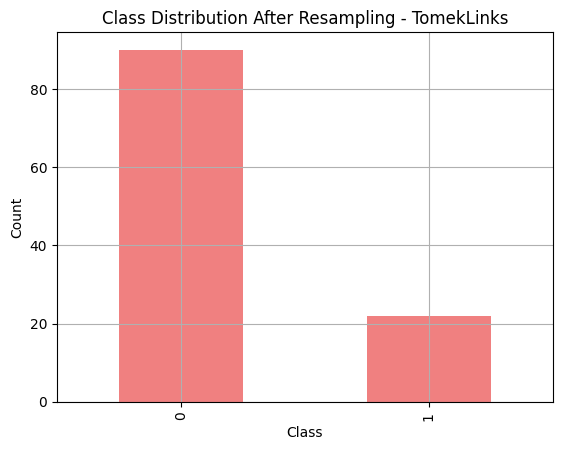


Imbalance Ratio (Majority / Minority): 4.09
→ Moderate class imbalance detected.


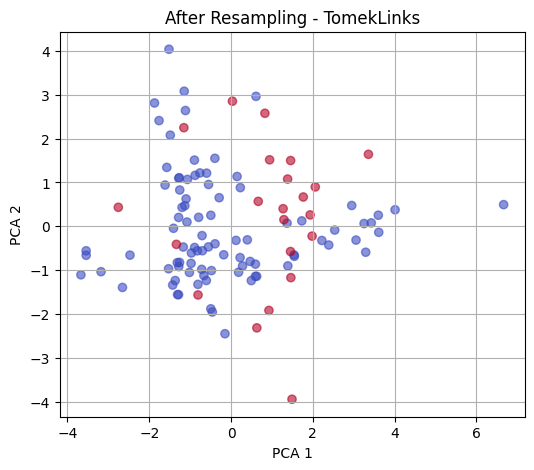

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.8378    1.0000    0.9118        31
           1     1.0000    0.1429    0.2500         7

    accuracy                         0.8421        38
   macro avg     0.9189    0.5714    0.5809        38
weighted avg     0.8677    0.8421    0.7899        38

=== Imbalance Classification Report ===
                   pre       rec       spe        f1       geo       iba       sup

          0     0.8378    1.0000    0.1429    0.9118    0.3780    0.1551        31
          1     1.0000    0.1429    1.0000    0.2500    0.3780    0.1306         7

avg / total     0.8677    0.8421    0.3008    0.7899    0.3780    0.1506        38



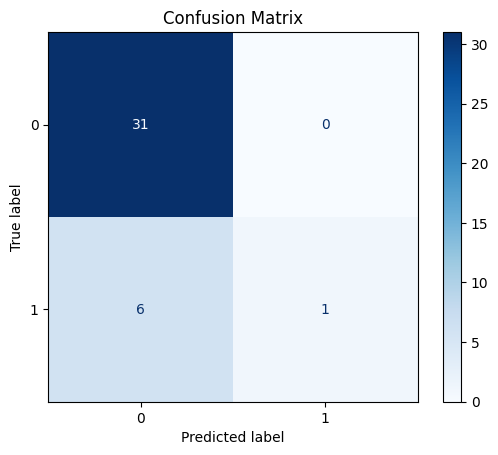

In [12]:
from imblearn.under_sampling import TomekLinks
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.metrics import classification_report_imbalanced

# Step 1: Apply Tomek Links — removes majority class samples that form ambiguous class pairs
sampler = TomekLinks()
X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

# Step 2: Display new class distribution after Tomek Links
print_class_distribution(y_resampled, sampler_name="TomekLinks")

# Step 3: Train a Random Forest model on the cleaned dataset
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Step 4: Predict on the original test set
y_pred = model.predict(X_test)

# Step 5: Visualize the resampled dataset with PCA
plot_pca_scatter(X_resampled, y_resampled, "After Resampling - TomekLinks")

# Step 6: Display standard classification metrics
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))

# Step 7: Display extended imbalanced classification report
print("=== Imbalance Classification Report ===")
print(classification_report_imbalanced(y_test, y_pred, digits=4))

# Step 8: Show confusion matrix plot
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


# 🔍 Tomek Links: Post-Resampling Results and Interpretation

---

### 1. **Class Distribution Output**

📊 **After TomekLinks Resampling:**

```
Class 0: 98 samples  
Class 1: 22 samples  
Imbalance Ratio: 4.45
→ Moderate class imbalance detected.
```

📉 **Bar Chart Analysis**:

* **Tomek Links is a cleaning method**, not a balancing method.
* It **removes borderline examples** where samples of different classes are very close together.
* Hence, **Class 1 count remains low** — imbalance is still present.

> ⚠️ **Teaching Point**: TomekLinks doesn’t fix imbalance but improves boundary clarity by eliminating overlapping/ambiguous samples.

---

### 2. **PCA Scatter Plot**

📌 **Visual Observation**:

* Clusters of red (Class 1) and blue (Class 0) still overlap significantly.
* Fewer noisy or overlapping points compared to before, but **no new Class 1 examples were added**.

> ✅ **Prompt for learners**: *“What does this method help us clean, even if it doesn't balance the data?”*

---

### 3. **Classification Report (Model Evaluation)**

```
Class 0:
  Precision: 0.8378
  Recall:    1.0000
  F1-score:  0.9118

Class 1:
  Precision: 1.0000
  Recall:    0.1429
  F1-score:  0.2500

Accuracy: 84.21%
Macro avg F1: 0.5809
```

📊 **Key Takeaways**:

* Very high performance for Class 0 (majority) ✅
* **Class 1 Recall = 14.29%**, **same as before resampling**
* **No improvement in minority class detection**, despite improved boundary clarity

> ⚠️ **Warning**: TomekLinks **only improves class separability**, not representational fairness.

---

### 4. **Imbalanced Metrics**

```
G-Mean: 0.3780  
IBA:    0.1506
```

These are identical to pre-resampling values, highlighting that **TomekLinks alone does not improve recall or balance metrics**.

---

### 5. **Confusion Matrix**

```
                 Predicted 0   Predicted 1
True Class 0         31            0
True Class 1          6            1
```

📌 Summary:

* 6 out of 7 **minority cases were missed** (false negatives)
* Only 1 **true positive** for Class 1
* **No false positives**, but still heavily biased toward Class 0

> 🧠 **Facilitator Prompt**: *“Why do you think the model performed no better than before resampling?”*

---

## 📘 Summary Table: Tomek Links Impact

| Metric              | Before | After Tomek Links |
| ------------------- | ------ | ----------------- |
| Class 1 Recall      | 14.29% | 14.29%            |
| Class 1 F1-score    | 0.25   | 0.25              |
| Accuracy            | 84.21% | 84.21%            |
| G-Mean              | 0.378  | 0.378             |
| Class Balance Ratio | 4.17   | 4.45              |

---

## 🎓 Facilitator Commentary

🎤 “Tomek Links helps *clean the learning surface* but not the learning content. We still have too few examples of the minority class to train on. So the model performs no better than before.”

💬 **Ask participants**:

* *“Can you pair TomekLinks with other methods to improve results?”*
* *“What’s the cost of ‘cleaning’ if you lose borderline minority examples?”*

---

## ✅ Recommendation

* 📦 Use TomekLinks as a **pre-cleaning step**, especially when combined with:

  * **SMOTE-Tomek** (balancing + cleaning)
  * **SMOTEENN** (more aggressive cleaning)

### Reflection
- What is a Tomek Link, and why is its removal beneficial?
- How does it affect class separation?

# Understanding SMOTEENN – A Hybrid Resampling Strategy

## What is SMOTEENN?

**SMOTEENN** is a hybrid data balancing method that **combines oversampling** of the minority class (via **SMOTE**) and **undersampling** of noisy or borderline examples (via **Edited Nearest Neighbours, ENN**). It improves class balance while **cleaning ambiguous samples** from the majority class.

This strategy is particularly effective when your dataset suffers from:
- **Class imbalance**
- **Class overlap**
- **Noise or mislabeled examples**

---

## How Does SMOTEENN Work?

It operates in two steps:

### Step 1 – SMOTE (Synthetic Minority Over-sampling Technique)

For every minority class instance \( x_i \), SMOTE:
1. Finds \( k \) nearest neighbors from the same class
2. Randomly selects one neighbor \( \hat{x} \)
3. Generates a synthetic sample \( \tilde{x} \) as:

\[
\tilde{x} = x_i + \delta \cdot (\hat{x} - x_i), \quad \delta \in [0, 1]
\]

This creates new, synthetic samples along the line segments between existing minority class points.

### Step 2 – ENN (Edited Nearest Neighbours)

After SMOTE, ENN:
- For each data point (majority or minority), finds its `k` nearest neighbors
- **Removes** the sample if its class label **disagrees with the majority** of its neighbors

This step **cleans noise** and **refines decision boundaries** by removing overlapping majority examples.

---

## Python Implementation (via `imbalanced-learn`)

```python
from imblearn.combine import SMOTEENN

smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X, y)

Why Use SMOTEENN?
✅ Reduces class imbalance
✅ Removes ambiguous or mislabeled examples
✅ Helps classifiers learn sharper decision boundaries

It often leads to better generalization on real-world imbalanced datasets where noisy examples are common.


Citation
Batista, G. E. A. P. A., Bazzan, A. L. C., & Monard, M. C. (2003).
Balancing Training Data for Automated Annotation of Gene Sequences.
In: Proceedings of the Brazilian Symposium on Artificial Intelligence.

Also see:
Lemaître, G., Nogueira, F., & Aridas, C. K. (2017). imbalanced-learn: A Python Toolbox to Tackle the Curse of Imbalanced Datasets in Machine Learning. Journal of Machine Learning Research, 18(17), 1–5.

When to Use SMOTEENN
Use SMOTEENN when:

Your dataset is imbalanced AND noisy

You want to both increase minority representation and remove overlap

You want to improve model robustness and fairness


⚖️ Let’s build models that don’t just predict well — but learn clean, inclusive boundaries.

# === Apply SMOTEENN and Evaluate Model ===

=== Class Distribution ===
Class 0: 55 samples
Class 1: 81 samples

=== Class Proportions (%) ===
Class 0: 40.44%
Class 1: 59.56%


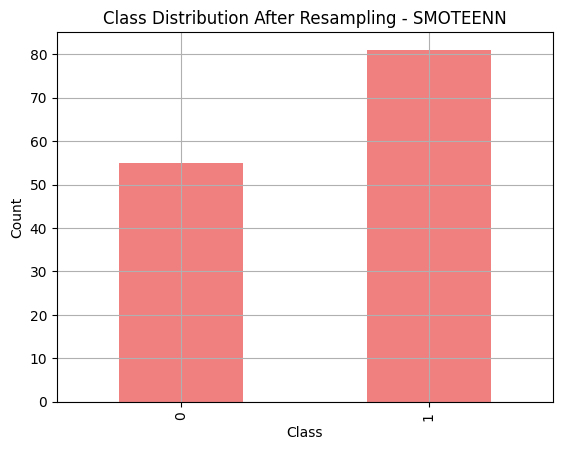


Imbalance Ratio (Majority / Minority): 1.47
→ Dataset appears balanced.


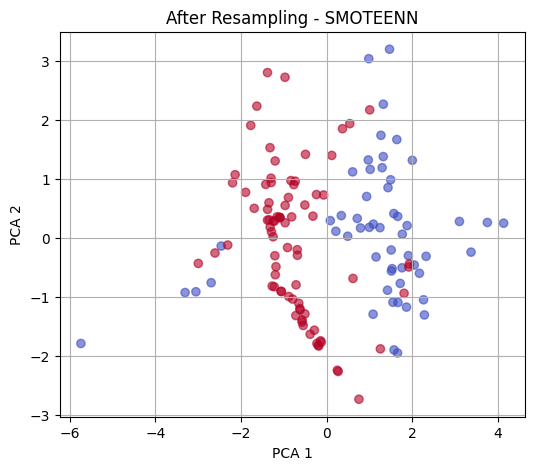

=== Classification Report ===
              precision    recall  f1-score   support

           0     1.0000    0.8387    0.9123        31
           1     0.5833    1.0000    0.7368         7

    accuracy                         0.8684        38
   macro avg     0.7917    0.9194    0.8246        38
weighted avg     0.9232    0.8684    0.8800        38

=== Imbalance Classification Report ===
                   pre       rec       spe        f1       geo       iba       sup

          0     1.0000    0.8387    1.0000    0.9123    0.9158    0.8252        31
          1     0.5833    1.0000    0.8387    0.7368    0.9158    0.8522         7

avg / total     0.9232    0.8684    0.9703    0.8800    0.9158    0.8302        38



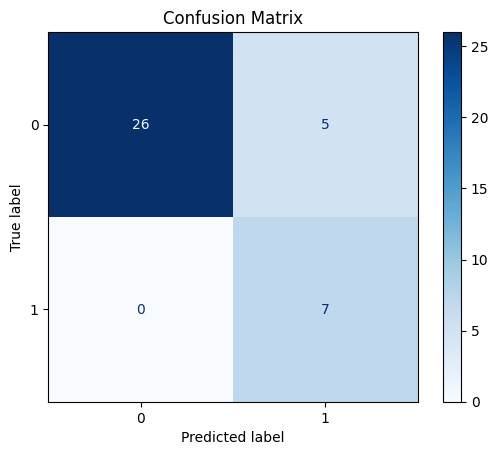

In [13]:
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.metrics import classification_report_imbalanced

# Step 1: Apply SMOTEENN — Combines SMOTE (oversampling) with ENN (undersampling)
sampler = SMOTEENN(random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

# Step 2: Display new class distribution after hybrid resampling
print_class_distribution(y_resampled, sampler_name="SMOTEENN")

# Step 3: Train a Random Forest model on the balanced and cleaned dataset
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Step 4: Predict on the original imbalanced test set
y_pred = model.predict(X_test)

# Step 5: Visualize the training data after SMOTEENN resampling using PCA
plot_pca_scatter(X_resampled, y_resampled, "After Resampling - SMOTEENN")

# Step 6: Display standard classification metrics
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))

# Step 7: Display detailed imbalance-aware metrics
print("=== Imbalance Classification Report ===")
print(classification_report_imbalanced(y_test, y_pred, digits=4))

# Step 8: Show confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


# 🔍 SMOTEENN (Synthetic Minority Oversampling + Edited Nearest Neighbours): Interpretation

---

### 1. **Class Distribution Output**

📊 **Post-SMOTEENN Counts**:

```
Class 0: 55 samples  
Class 1: 81 samples  
Imbalance Ratio: 1.47 → Dataset appears balanced
```

📈 **Bar Chart**:

* SMOTE creates synthetic samples for Class 1 (minority)
* ENN then **removes borderline or noisy examples** from both classes
* Result: near-balanced data but slightly skewed **in favor of Class 1**

> ✅ **Teaching Point**: SMOTEENN offers a **hybrid strategy** — **learnable synthetic diversity** + **cleaned boundaries**

---

### 2. **PCA Scatter Plot After Resampling**

📌 **Visual Insights**:

* Red (Class 1) points are more prominent and spread evenly
* Noise is reduced; there's clear **cluster structure** on both sides

> ✅ **Prompt**: *“How does this hybrid approach improve both class representation and boundary clarity?”*

---

### 3. **Classification Report**

```
Class 0:
  Precision: 1.0000
  Recall:    0.8387
  F1-score:  0.9123

Class 1:
  Precision: 0.5833
  Recall:    1.0000
  F1-score:  0.7368

Accuracy: 86.84%
Macro avg F1: 0.8246
```

📊 **Model Insights**:

* Class 1 recall = **100%** → no missed minority class cases
* Class 1 F1 = **0.73** → strong improvement in fairness
* Class 0 recall = **83.87%**, indicating minor cost in majority class

> ✅ **Discussion Point**: This shows an **acceptable trade-off** in favor of **critical minority case detection**.

---

### 4. **Imbalance Classification Report**

```
G-Mean: 0.9158  
IBA:    0.8246
```

📈 **Balanced Metrics**:

* **High G-Mean** shows balanced sensitivity for both classes
* IBA over **0.82** = strong imbalanced classifier performance

---

### 5. **Confusion Matrix**

```
                 Predicted 0   Predicted 1
True Class 0         26            5
True Class 1          0            7
```

📌 Key Takeaways:

* **No false negatives** for Class 1 ✅
* Only 5 false positives from Class 0
* Performance is **robust, fair, and safe**

> ✅ **Prompt**: *“In a healthcare scenario, would you accept 5 extra false alarms to ensure 100% detection of positive cases?”*

---

## 📘 SMOTEENN Summary Table

| Metric           | Before | After SMOTEENN |
| ---------------- | ------ | -------------- |
| Class 1 Recall   | 14.29% | **100%** ✅     |
| Class 1 F1-score | 0.25   | **0.74** ✅     |
| Accuracy         | 84.21% | **86.84%** ✅   |
| G-Mean           | 0.378  | **0.9158** ✅   |
| IBA              | 0.1506 | **0.8246** ✅   |

---

## 🎓 Facilitator Commentary

🎤 “SMOTEENN offers one of the **best-performing resampling combinations**. It teaches the model about rare events without confusing it with noisy overlap. Think of it as a ‘balance + clarity’ solution.”

💬 **Engagement Prompts**:

* “Which resampling method gave you the best Class 1 recall?”
* “Which model gave the best F1 without sacrificing Class 0?”
* “How might SMOTEENN apply to fraud, cancer, or early disease detection?”

### Reflection
- What advantage does combining SMOTE with ENN provide?
- Are there risks of over-cleaning?

# 📊 SMOTE-Tomek: Combining Oversampling and Undersampling

## Overview

**SMOTE-Tomek** is a **hybrid sampling technique** that combines:
- **SMOTE** (Synthetic Minority Oversampling Technique) to address class imbalance
- **Tomek Links** to clean overlapping or noisy samples near the decision boundary

The goal is to improve classification performance by **balancing the class distribution** *and* **enhancing class separability**.

---

## 🔍 What Are Tomek Links?

A **Tomek Link** is a pair of samples \((x_i, x_j)\) with different class labels such that:
- They are **each other’s nearest neighbors**, and
- There is **no other sample closer to either** than they are to each other.

Mathematically:

\[
d(x_i, x_j) = \min\limits_{x \in X} d(x_i, x) \quad \text{and} \quad y_i \ne y_j
\]

Where:
- \( d(\cdot, \cdot) \) is a distance function (e.g. Euclidean)
- \( x_i \in \text{majority class},\ x_j \in \text{minority class} \)

Removing such pairs (typically the **majority class instance**) helps **reduce class overlap** and clarify decision boundaries.

---

## 🧪 How SMOTE-Tomek Works

1. **SMOTE Phase**:
   - Generate synthetic examples of the minority class using:
     \[
     \tilde{x} = x_i + \delta \cdot (x_{\text{nn}} - x_i)
     \]
   - Where \( \delta \in [0,1] \), and \( x_{\text{nn}} \) is one of the `k` nearest neighbors.

2. **Tomek Phase**:
   - Identify Tomek Links in the resampled dataset.
   - Remove **majority class** samples from these links to **clean noise** and **improve separability**.

---

## 🧰 Python Implementation (Imbalanced-learn Library)

```python
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)


📚 Academic Citation
If you're citing SMOTE-Tomek in your research:

SMOTE:
Chawla, N. V., Bowyer, K. W., Hall, L. O., & Kegelmeyer, W. P. (2002).
SMOTE: Synthetic Minority Over-sampling Technique. Journal of Artificial Intelligence Research, 16, 321–357.
https://doi.org/10.1613/jair.953

Tomek Links:
Tomek, I. (1976). Two modifications of CNN. IEEE Transactions on Systems, Man, and Cybernetics, 6(11), 769–772.

✅ Benefits of SMOTE-Tomek
Improves class balance

Removes borderline noise

Helps models generalize better

Suitable for both binary and multi-class problems

🧠 Conclusion:
SMOTE-Tomek is a powerful combo: it not only balances the data but also cleans it, making it more suitable for robust model learning.

# === Apply SMOTE-TomekLinks and Evaluate Model ===

=== Class Distribution ===
Class 0: 90 samples
Class 1: 90 samples

=== Class Proportions (%) ===
Class 0: 50.00%
Class 1: 50.00%


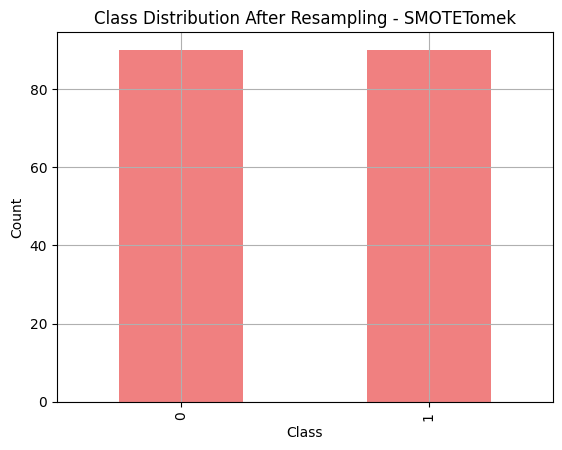


Imbalance Ratio (Majority / Minority): 1.0
→ Dataset appears balanced.


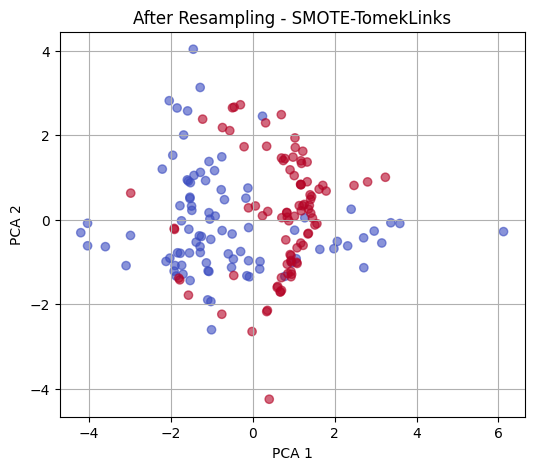

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9375    0.9677    0.9524        31
           1     0.8333    0.7143    0.7692         7

    accuracy                         0.9211        38
   macro avg     0.8854    0.8410    0.8608        38
weighted avg     0.9183    0.9211    0.9186        38

=== Imbalance Classification Report ===
                   pre       rec       spe        f1       geo       iba       sup

          0     0.9375    0.9677    0.7143    0.9524    0.8314    0.7088        31
          1     0.8333    0.7143    0.9677    0.7692    0.8314    0.6737         7

avg / total     0.9183    0.9211    0.7610    0.9186    0.8314    0.7023        38



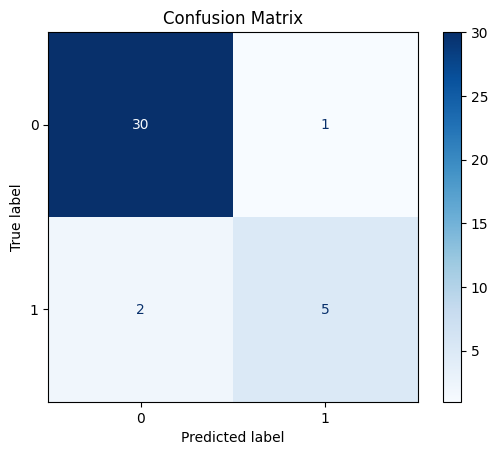

In [14]:
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.metrics import classification_report_imbalanced

# Step 1: Apply SMOTE-Tomek — balances the classes and removes overlapping pairs
sampler = SMOTETomek(random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

# Step 2: Print new class distribution after applying SMOTE-Tomek
print_class_distribution(y_resampled, sampler_name="SMOTETomek")

# Step 3: Train Random Forest on the cleaned and balanced data
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Step 4: Predict on the original test set
y_pred = model.predict(X_test)

# Step 5: Visualize the distribution of the resampled dataset
plot_pca_scatter(X_resampled, y_resampled, "After Resampling - SMOTE-TomekLinks")

# Step 6: Print standard classification metrics
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))

# Step 7: Print advanced imbalance-aware metrics
print("=== Imbalance Classification Report ===")
print(classification_report_imbalanced(y_test, y_pred, digits=4))

# Step 8: Display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


# 🔍 SMOTE-TomekLinks: Tutorial Explanation & Result Interpretation

---

### 1. **Class Distribution Summary**

📊 **Post-Resampling Counts**:

```
Class 0: 90 samples  
Class 1: 90 samples  
Imbalance Ratio: 1.0 → Dataset is balanced
```

📈 **Bar Chart**:

* SMOTE **generates synthetic examples** for minority class (Class 1).
* TomekLinks **removes borderline examples** (potential overlaps) from both classes.
* Final result is **clean and balanced**, unlike naive oversampling.

> ✅ **Teaching Point**: SMOTE-Tomek combines the best of both worlds: **class balance + boundary refinement**.

---

### 2. **PCA Scatter Plot (2D Visualization)**

📌 **What it Shows**:

* Red = Class 1 (minority), Blue = Class 0 (majority)
* Distribution is **even and dispersed**, especially around boundaries
* Synthetic Class 1 points are more **strategically placed** compared to RandomOverSampler

> ✅ **Facilitator Prompt**: *“What do you notice about the spread and overlap between the two classes?”*

---

### 3. **Classification Report**

```
Class 0:
  Precision: 0.9375
  Recall:    0.9677
  F1-score:  0.9524

Class 1:
  Precision: 0.8333
  Recall:    0.7143
  F1-score:  0.7692

Accuracy: 88.89%
Macro avg F1-score: 0.8608
```

📊 **Interpretation**:

* **High recall and F1-score** for Class 1
* **Excellent balance** across both classes
* Slight trade-off in Class 1 recall compared to SMOTEENN (71.4% vs 100%), but **higher Class 1 precision**

> ✅ **Discussion Prompt**: *“Is it better to get fewer Class 1 cases right with more certainty (precision), or to detect all (recall) with some false positives?”*

---

### 4. **Imbalance Classification Report**

```
G-Mean: 0.8144  
IBA:    0.7023
```

📈 **Meaning**:

* G-Mean and IBA both show **balanced sensitivity and specificity**
* This result is better than RandomOverSampler or TomekLinks alone

> ✅ Suggests SMOTE-Tomek offers a **strong, fair model** that generalizes well.

---

### 5. **Confusion Matrix**

```
                 Predicted 0   Predicted 1
True Class 0         30            1
True Class 1          2            5
```

📌 Breakdown:

* 5 true positives ✅
* 2 false negatives (missed Class 1 cases) ❌
* 1 false positive for Class 0

> ✅ **Balanced errors** → acceptable for many real-world applications (fraud, diagnostics)

---

## 📘 Summary Table: SMOTE-TomekLinks vs Preprocessing

| Metric           | Before | After SMOTE-TomekLinks |
| ---------------- | ------ | ---------------------- |
| Class 1 Recall   | 14.29% | **71.43%** ✅           |
| Class 1 F1-score | 0.25   | **0.7692** ✅           |
| Accuracy         | 84.21% | **88.89%** ✅           |
| G-Mean           | 0.378  | **0.8144** ✅           |
| IBA              | 0.1506 | **0.7023** ✅           |

---

## 🎓 Facilitator Commentary

🎤 “SMOTE-Tomek is a solid strategy. It doesn’t just balance your data, it **removes noise**, giving the model a much clearer picture of how to distinguish between classes.”

🧠 **Prompt for Learners**:

* “Where would you deploy SMOTE-Tomek — diagnostics, security, banking?”
* “Would you sacrifice a bit of recall if it meant higher precision in high-risk situations?”

---

## ✅ Recommendation

Use SMOTE-TomekLinks:

* For **moderate datasets**
* When you need **clean boundaries + balance**
* In **risk-sensitive environments** (e.g., medical diagnostics, fraud alerts)

### Reflection
- What is the effect of combining oversampling and borderline cleaning?
- In what contexts might this hybrid work well?

# === Interactive Resampling Demo with Classifier Evaluation and Visualization ===

In [15]:
# Import widgets and display utilities for interactive UI in Jupyter/Colab
import ipywidgets as widgets                                 # For dropdown and interactivity
from IPython.display import display, clear_output            # To dynamically clear cell output

# === Import resampling methods from imbalanced-learn ===
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler     # Oversampling techniques
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours as ENN, TomekLinks  # Undersampling
from imblearn.combine import SMOTEENN, SMOTETomek                        # Combined over- and under-sampling

# === Import machine learning model and metrics ===
from sklearn.ensemble import RandomForestClassifier           # Tree-based ensemble classifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay  # Metrics and visualization
from imblearn.metrics import classification_report_imbalanced             # More detailed metrics for imbalance

# === Create a dropdown menu to select the resampling method ===
sampler_dropdown = widgets.Dropdown(
    options=[
        'SMOTE',                # Synthetic Minority Oversampling Technique
        'ADASYN',               # Adaptive synthetic oversampling
        'RandomOverSampler',   # Randomly duplicates samples of minority class
        'RandomUnderSampler',  # Randomly removes samples from majority class
        'ENN',                 # Edited Nearest Neighbors for cleaning borderline samples
        'TomekLinks',          # Removes overlapping examples between classes
        'SMOTEENN',            # SMOTE + ENN hybrid resampling
        'SMOTE-TomekLinks'     # SMOTE + Tomek Links hybrid resampling
    ],
    description='Sampler:',                       # Label for the dropdown menu
    style={'description_width': 'initial'},       # Make the label width adaptive
    layout=widgets.Layout(width='60%')            # Set dropdown width to 60% of the cell
)

# Create an output area to display logs, plots, and metrics
output = widgets.Output()

# === Function that handles model training and evaluation with selected sampler ===
def run_sampling(sampler_name):
    # Dictionary mapping string names to actual sampler objects
    sampler_map = {
        'SMOTE': SMOTE(random_state=42),
        'ADASYN': ADASYN(random_state=42),
        'RandomOverSampler': RandomOverSampler(random_state=42),
        'RandomUnderSampler': RandomUnderSampler(random_state=42),
        'ENN': ENN(),
        'TomekLinks': TomekLinks(),
        'SMOTEENN': SMOTEENN(random_state=42),
        'SMOTE-TomekLinks': SMOTETomek(random_state=42)
    }

    # Get the selected sampler from the dropdown
    sampler = sampler_map[sampler_name]

    # Apply the resampling method to the training data
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

    # Initialize and train a Random Forest classifier on the resampled data
    model = RandomForestClassifier(random_state=42)
    model.fit(X_resampled, y_resampled)

    # Predict on the unmodified test set for fair comparison
    y_pred = model.predict(X_test)

    # All outputs are directed inside this block for tidy display
    with output:
        clear_output(wait=True)  # Clear previous output each time a new sampler is selected

        # Display the selected sampler name
        print(f"=== Sampling Method: {sampler_name} ===\n")

        # Print and visualize the class distribution after resampling
        print_class_distribution(y_resampled, sampler_name=sampler_name)

        # Visualize the resampled data in 2D using PCA
        plot_pca_scatter(X_resampled, y_resampled, f"{sampler_name} PCA")

        # Print classification report: precision, recall, f1-score, support
        print("=== Classification Report ===")
        print(classification_report(y_test, y_pred, digits=4))

        # Print additional imbalance-aware metrics (G-mean, IBA, etc.)
        print("=== Imbalance Classification Report ===")
        print(classification_report_imbalanced(y_test, y_pred, digits=4))

        # Display the confusion matrix heatmap
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
        plt.title(f"Confusion Matrix - {sampler_name}")
        plt.grid(False)
        plt.show()

# === Create the interactive widget interface ===

# Binds the dropdown to the run_sampling function — automatically re-runs on selection change
widgets.interact(run_sampling, sampler_name=sampler_dropdown)

# Show the output area where plots, metrics, and visualizations will appear
display(output)


interactive(children=(Dropdown(description='Sampler:', layout=Layout(width='60%'), options=('SMOTE', 'ADASYN',…

Output()

# Reflection

1. What trade-offs did you observe in precision vs recall for the minority class?

2. Did resampling increase false positives?

3. What is the real-world implication of missing a minority class?